In [1]:
import pandas as pd
import numpy as np
import h5py
import tables
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
def pair_article_cluster(filename):
    hf = h5py.File(filename, 'r')
    x1 = hf['unique_IDF']
    ddf = pd.DataFrame()
    cnt = 0
    for key, val in x1.items():
        df = pd.DataFrame()
        x2 = x1[key]['_ref']
        x2 = np.array(x2)
        #print(x2)
        #print(str(key))
        x3 = x1[key]['V']
        #print(np.array(x3))
        
        df['pmid'] = x2
        df['file'] = str(key)
       
        ddf = pd.concat([ddf, df], axis=0, ignore_index=True)
        #cnt += 1
        #if cnt == 2:
    #break
    hf.close()
    return ddf
ddf = pair_article_cluster('document_scores.h5')
ddf.tail(5)
ddf.to_csv("article_file.csv", index = False)

In [2]:
data = pd.read_csv("article_file.csv")
data = data.set_index('pmid').to_dict()['file']
if 198051 in data:
    print(data.get(198051))
else:
    print("no")

pmid_title_abstract_1.csv


In [8]:
def cosine_similarity2(a, b):
    nominator = np.dot(a, b)
    
    a_norm = np.sqrt(np.sum(a**2))
    b_norm = np.sqrt(np.sum(b**2))
    
    denominator = a_norm * b_norm
    
    cosine_similarity = nominator / denominator
    
    return cosine_similarity

In [43]:
def similarity_find(yr,in_cluster, pair):
    hf = h5py.File('document_scores.h5', 'r')
    x1 = hf['unique_IDF']
    sim_tab = []
    if in_cluster == 1:
        dd = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
        dd = dd.sort_values(by=['n'], ascending = False)
        dd = dd.head(10)
        dd = dd.sample(n=1)
        #print(dd)
        a = dd.iloc[0]['cluster']
        cluster = int(a)
        print("selected cluster ",cluster)
        
        leiden_tab = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_"+str(yr)+".tsv", sep="\t")
        leiden_tab = leiden_tab[leiden_tab['cl'] == cluster]
        for i in range(pair):
            p = leiden_tab.sample(n=2)
            #print("inside")
            #print(p)
            #print(p.iloc[0]['id']," : ",p.iloc[1]['id'])
            art1 = p.iloc[0]['id']
            art2 = p.iloc[1]['id']
            file1, file2 = "",""
            #print(art1," ** ",art2)
            if art1 in data:
                file1 = data.get(art1)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            if art2 in data:
                file2 = data.get(art2)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            #print("file 1",file1)
            bbc1 = x1[file1]
            ff1 = bbc1['_ref']
            ff1 = np.array(ff1)
            loc1 = np.where(ff1==art1)[0][0]
            arr1 = bbc1['V'][loc1]
            #print(arr1)
            
            bbc2 = x1[file2]
            ff2 = bbc2['_ref']
            ff2 = np.array(ff2)
            loc2 = np.where(ff2==art2)[0][0]
            arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
            a1 = arr1.reshape(1, -1)
            a2 = arr2.reshape(1, -1)
            cs2 = cosine_similarity(a1, a2)
            sim_tab.append((cs2[0][0]))
        
    else:
        print("out")
        leiden_tab = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_"+str(yr)+".tsv", sep="\t")
        for i in range(pair):
            p = leiden_tab.sample(n=2)
            #print(p)
            #print(p.iloc[0]['id']," : ",p.iloc[1]['id'])
            art1 = p.iloc[0]['id']
            art2 = p.iloc[1]['id']
            file1, file2 = "",""
            if art1 in data:
                file1 = data.get(art1)
            else:
                continue
            if art2 in data:
                file2 = data.get(art2)
            else:
                continue
            #print("file 1",file1)
            bbc1 = x1[file1]
            ff1 = bbc1['_ref']
            ff1 = np.array(ff1)
            loc1 = np.where(ff1==art1)[0][0]
            arr1 = bbc1['V'][loc1]
            #print(arr1)
            
            bbc2 = x1[file2]
            ff2 = bbc2['_ref']
            ff2 = np.array(ff2)
            loc2 = np.where(ff2==art2)[0][0]
            arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
            a1 = arr1.reshape(1, -1)
            a2 = arr2.reshape(1, -1)
            cs2 = cosine_similarity(a1, a2)
            sim_tab.append((cs2[0][0]))
            
    hf.close()
    return sim_tab
        
    
cnt = 0
inclus = []
outclus = []
while (cnt <= 50):
    y = random.randint(1995, 2015)
    print("year ",y)
    sim_tab1 = similarity_find(yr = y, in_cluster = 1, pair = 50)
    sim_tab1 = [x for x in sim_tab1 if x != 'nan']
    #print(len(sim_tab1), " simtab1")
    inclus = inclus + sim_tab1
    

    sim_tab2 = similarity_find(yr = y, in_cluster = 0, pair = 50)
    sim_tab2 = [x for x in sim_tab2 if x != 'nan']
    #print(len(sim_tab2), " simtab2")
    outclus = outclus + sim_tab2
    
    cnt += 1
indata = pd.DataFrame()
indata['value'] = inclus

outdata = pd.DataFrame()
outdata['value'] = outclus
indata.to_csv("indata_11.csv", index = False)
outdata.to_csv("outdata_11.csv", index = False)
#print(len(indata)," len indata")
#print(len(outdata)," len outdata")
#print(sim_tab1)

year  2014
selected cluster  7
out
year  2013
selected cluster  4
out
year  2014
selected cluster  8
out
year  2015
selected cluster  0
out
year  2008
selected cluster  0
out
year  2005
selected cluster  5
out
year  2002
selected cluster  3
out
year  2010
selected cluster  7
out
year  2004
selected cluster  9
out
year  2004
selected cluster  6
out
year  2012
selected cluster  7
out
year  1995
selected cluster  7
out
year  1999
selected cluster  0
out
year  1996
selected cluster  1
out
year  2007
selected cluster  1
out
year  1997
selected cluster  1
out
year  2011
selected cluster  0
out
year  2010
selected cluster  4
out
year  2010
selected cluster  3
out
year  2015
selected cluster  8
out
year  2015
selected cluster  7
out
year  2015
selected cluster  3
out
year  2004
selected cluster  3
out
year  2008
selected cluster  4
out
year  1999
selected cluster  8
out
year  2006
selected cluster  4
out
year  1999
selected cluster  5
out
year  2002
selected cluster  1
out
year  1996
selected 

In [61]:
##alternate
def similarity_find(yr,in_cluster, pair):
    hf = h5py.File('document_scores.h5', 'r')
    x1 = hf['unique_IDF']
    sim_tab = []
    if in_cluster == 1:
        dd = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
        dd = dd.sort_values(by=['n'], ascending = False)
        dd = dd.head(10)
        dd = dd.sample(n=1)
        #print(dd)
        a = dd.iloc[0]['cluster']
        cluster = int(a)
        print("selected cluster ",cluster)
        
        leiden_tab = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_"+str(yr)+".tsv", sep="\t")
        leiden_tab = leiden_tab[leiden_tab['cl'] == cluster]
        for i in range(pair):
            p = leiden_tab.sample(n=2)
            #print("inside")
            #print(p)
            #print(p.iloc[0]['id']," : ",p.iloc[1]['id'])
            art1 = p.iloc[0]['id']
            art2 = p.iloc[1]['id']
            file1, file2 = "",""
            #print(art1," ** ",art2)
            if art1 in data:
                file1 = data.get(art1)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            if art2 in data:
                file2 = data.get(art2)
                #print("oh yes")
            else:
                #print("oh no")
                continue
            #print("file 1",file1)
            bbc1 = x1[file1]
            ff1 = bbc1['_ref']
            ff1 = np.array(ff1)
            loc1 = np.where(ff1==art1)[0][0]
            arr1 = bbc1['V'][loc1]
            #print(arr1)
            
            bbc2 = x1[file2]
            ff2 = bbc2['_ref']
            ff2 = np.array(ff2)
            loc2 = np.where(ff2==art2)[0][0]
            arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
            a1 = arr1.reshape(1, -1)
            a2 = arr2.reshape(1, -1)
            cs2 = cosine_similarity(a1, a2)
            sim_tab.append((cs2[0][0]))
        
    else:
        print("out")
        leiden_tab = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_"+str(yr)+".tsv", sep="\t")
        for i in range(pair):
            p = leiden_tab.sample(n=2)
            #print(p)
            #print(p.iloc[0]['id']," : ",p.iloc[1]['id'])
            art1 = p.iloc[0]['id']
            art2 = p.iloc[1]['id']
            file1, file2 = "",""
            if art1 in data:
                file1 = data.get(art1)
            else:
                continue
            if art2 in data:
                file2 = data.get(art2)
            else:
                continue
            #print("file 1",file1)
            bbc1 = x1[file1]
            ff1 = bbc1['_ref']
            ff1 = np.array(ff1)
            loc1 = np.where(ff1==art1)[0][0]
            arr1 = bbc1['V'][loc1]
            #print(arr1)
            
            bbc2 = x1[file2]
            ff2 = bbc2['_ref']
            ff2 = np.array(ff2)
            loc2 = np.where(ff2==art2)[0][0]
            arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
            a1 = arr1.reshape(1, -1)
            a2 = arr2.reshape(1, -1)
            cs2 = cosine_similarity(a1, a2)
            sim_tab.append((cs2[0][0]))
            
    hf.close()
    return np.average(sim_tab)
        
    
cnt = 0
inclus = []
outclus = []
while (cnt <= 100):
    y = random.randint(1995, 2015)
    print("year ",y)
    sim_tab1 = similarity_find(yr = y, in_cluster = 1, pair = 100)
    #sim_tab1 = [x for x in sim_tab1 if x != 'nan']
    #print(len(sim_tab1), " simtab1")
    inclus.append(sim_tab1)
    

    sim_tab2 = similarity_find(yr = y, in_cluster = 0, pair = 100)
    #sim_tab2 = [x for x in sim_tab2 if x != 'nan']
    #print(len(sim_tab2), " simtab2")
    outclus.append(sim_tab2)
    
    cnt += 1
indata = pd.DataFrame()
indata['value'] = inclus

outdata = pd.DataFrame()
outdata['value'] = outclus
indata.to_csv("indata_xx1.csv", index = False)
outdata.to_csv("outdata_xx1.csv", index = False)
#print(len(indata)," len indata")
#print(len(outdata)," len outdata")
#print(sim_tab1)

year  1997
selected cluster  2
out
year  1997
selected cluster  7
out
year  2001
selected cluster  6
out
year  1996
selected cluster  1
out
year  1996
selected cluster  3
out
year  2001
selected cluster  6
out
year  2009
selected cluster  9
out
year  1999
selected cluster  4
out
year  2008
selected cluster  4
out
year  2007
selected cluster  9
out
year  2007
selected cluster  1
out
year  2010
selected cluster  4
out
year  2002
selected cluster  7
out
year  2002
selected cluster  4
out
year  2015
selected cluster  9
out
year  2011
selected cluster  5
out
year  1996
selected cluster  2
out
year  2008
selected cluster  6
out
year  2009
selected cluster  8
out
year  2014
selected cluster  0
out
year  2006
selected cluster  7
out
year  1999
selected cluster  1
out
year  2008
selected cluster  4
out
year  1998
selected cluster  8
out
year  2006
selected cluster  5
out
year  2003
selected cluster  6
out
year  2007
selected cluster  1
out
year  2007
selected cluster  0
out
year  1996
selected 

length  101


(array([ 3.,  7., 15., 16., 23., 10., 16.,  6.,  2.,  3.]),
 array([0.02292808, 0.0283454 , 0.03376272, 0.03918004, 0.04459736,
        0.05001468, 0.055432  , 0.06084932, 0.06626664, 0.07168396,
        0.07710128]),
 <BarContainer object of 10 artists>)

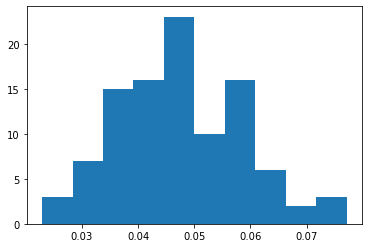

In [62]:
print("length ",len(outclus))
plt.hist(outclus)

length  101


(array([ 2.,  4., 16., 18., 18., 10., 22.,  7.,  2.,  2.]),
 array([0.01849181, 0.02559238, 0.03269294, 0.03979351, 0.04689408,
        0.05399465, 0.06109522, 0.06819579, 0.07529635, 0.08239692,
        0.08949749]),
 <BarContainer object of 10 artists>)

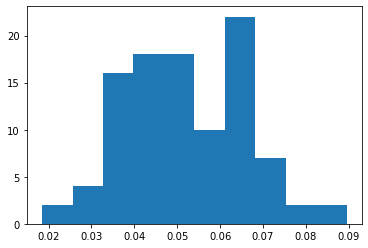

In [63]:
print("length ",len(inclus))
plt.hist(inclus)

In [53]:
##for testing only
hf = h5py.File('document_scores.h5', 'r')
x1 = hf['unique_IDF']
g = x1['pmid_title_abstract_113.csv']
gg = g['_ref']
gg = np.array(gg)
ggg = np.where(gg==1689454)[0][0]
gggg = g['V'][ggg]
hf.close()
gggg

array([-0.00748087, -0.08904818,  0.10084579, -0.06051684, -0.13011573,
       -0.07600196,  0.02659931, -0.00663016,  0.01505688,  0.06272654,
        0.16139613, -0.07552758,  0.0811952 , -0.04911257, -0.03946442,
       -0.00159671, -0.0399002 ,  0.00031885,  0.00999099, -0.01965401,
       -0.03382128, -0.03689697, -0.0601862 ,  0.03287344,  0.05454678,
       -0.04703299,  0.02623222, -0.00064593, -0.00193572,  0.0655526 ,
       -0.06371159, -0.04902389,  0.02659158, -0.05265336,  0.04147202,
       -0.0268285 ,  0.03902024, -0.02696532,  0.05072479, -0.02102615,
        0.16091233, -0.08373624, -0.01672606, -0.05529075,  0.0323751 ,
       -0.12475885, -0.07907082, -0.04385109,  0.01127716,  0.03038131,
       -0.0780873 , -0.19873222,  0.01193501,  0.11955702, -0.14569383,
       -0.11280735, -0.06827941, -0.05270819, -0.00939804,  0.03615674,
        0.02315178,  0.12061616, -0.01587165,  0.061909  ,  0.03601536,
        0.00704149, -0.00722794,  0.01625779, -0.10800617, -0.06

In [40]:
xx1 = []
d1 = pd.read_csv("indata_1.csv")
#print(len(d1))
dd = pd.read_csv("indata_2.csv")
#print(len(dd))
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
#print(len(d1))
dd = pd.read_csv("indata_3.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
#print(len(d1))
dd = pd.read_csv("indata_4.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
#print(len(d1))
dd = pd.read_csv("indata_5.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
dd = pd.read_csv("indata_6.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
dd = pd.read_csv("indata_7.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
dd = pd.read_csv("indata_8.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
dd = pd.read_csv("indata_9.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
dd = pd.read_csv("indata_10.csv")
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)
print(len(d1))


d2 = pd.read_csv("outdata_1.csv")
dd = pd.read_csv("outdata_2.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_3.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_4.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_5.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_6.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_7.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_8.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_9.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
dd = pd.read_csv("outdata_10.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)
print(len(d2))

22544
22569


(array([1.300e+01, 1.069e+03, 8.764e+03, 7.349e+03, 2.818e+03, 9.540e+02,
        3.690e+02, 1.050e+02, 2.000e+01, 7.000e+00]),
 array([-0.33088588, -0.21439241, -0.09789895,  0.01859451,  0.13508798,
         0.25158144,  0.3680749 ,  0.48456837,  0.60106183,  0.7175553 ,
         0.83404876]),
 <BarContainer object of 10 artists>)

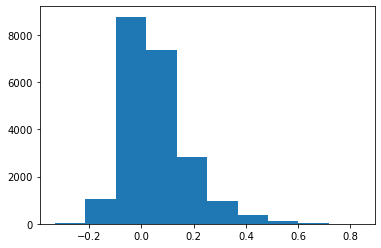

In [41]:
plt.hist(d2['value'])

(array([1.000e+01, 1.230e+03, 9.731e+03, 6.945e+03, 2.305e+03, 7.400e+02,
        2.370e+02, 6.600e+01, 1.200e+01, 3.000e+00]),
 array([-0.34340972, -0.21869696, -0.09398421,  0.03072854,  0.15544129,
         0.28015404,  0.40486679,  0.52957955,  0.6542923 ,  0.77900505,
         0.9037178 ]),
 <BarContainer object of 10 artists>)

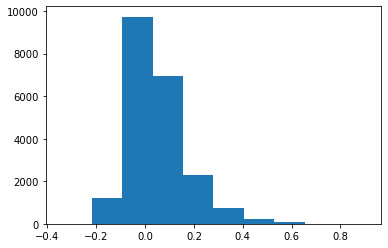

In [42]:
plt.hist(d1['value'])

In [20]:
print(len(d1))
print(len(d2))

4100
4098


In [22]:
dd = pd.read_csv("indata_2.csv")
print(len(dd))

4100


In [46]:
leiden = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/leiden_cluster_table_2013.tsv", sep="\t")
part1 = leiden[leiden['cl'] == 10]
part2 = leiden[leiden['cl'] == 15]
print(part1.head(5))
print("%%%%%%%%%")
print(part2.head(5))

               id  cl
189718   13404306  10
202761    1127378  10
259581    1149045  10
1401310   2160503  10
1403943   1868446  10
%%%%%%%%%
              id  cl
268064    559947  15
327609    598084  15
449793   5047789  15
578629  16674293  15
578631  14961210  15


In [10]:
hf = h5py.File('document_scores.h5', 'r')
x1 = hf['unique_IDF']
#art1 = 19420254
#art2 = 20936661

art1 = 27599104
art2 = 31600197

file1, file2 = "",""
if art1 in data:
    file1 = data.get(art1)
else:
    print("on no")
if art2 in data:
    file2 = data.get(art2)
else:
    print("on no")
            #print("file 1",file1)
bbc1 = x1[file1]
ff1 = bbc1['_ref']
ff1 = np.array(ff1)
loc1 = np.where(ff1==731516)[0][0]
arr1 = bbc1['V'][loc1]
            #print(arr1)
            
bbc2 = x1[file2]
ff2 = bbc2['_ref']
ff2 = np.array(ff2)
loc2 = np.where(ff2==2486228)[0][0]
arr2 = bbc2['V'][loc2]
            #print(arr2)
            #sim_tab.append(1.0-distance.cosine(arr1, arr2))
            #sim_tab.append(cosine_similarity2(arr1, arr2))
            
a1 = arr1.reshape(1, -1)
a2 = arr2.reshape(1, -1)
cs2 = cosine_similarity(a1, a2)
print(cs2[0][0])

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required by check_pairwise_arrays.

In [4]:
d1 = pd.read_csv("indata_xx.csv")
#print(len(d1))
dd = pd.read_csv("indata_xx1.csv")
#print(len(dd))
d1 = pd.concat([d1, dd], axis=0, ignore_index=True)

d2 = pd.read_csv("outdata_xx.csv")
dd = pd.read_csv("outdata_xx1.csv")
d2 = pd.concat([d2, dd], axis=0, ignore_index=True)

print(len(d1))
print(len(d2))

202
202


(array([ 5.,  9., 31., 36., 43., 36., 24., 10.,  5.,  3.]),
 array([0.01886829, 0.02546645, 0.03206462, 0.03866278, 0.04526094,
        0.0518591 , 0.05845726, 0.06505542, 0.07165358, 0.07825174,
        0.0848499 ]),
 <BarContainer object of 10 artists>)

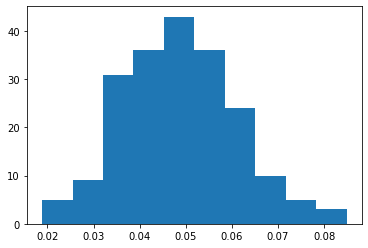

In [5]:
plt.hist(d2['value'])

(array([ 3., 12., 26., 32., 47., 28., 35., 12.,  5.,  2.]),
 array([0.0157654 , 0.02313861, 0.03051182, 0.03788502, 0.04525823,
        0.05263144, 0.06000465, 0.06737786, 0.07475107, 0.08212428,
        0.08949749]),
 <BarContainer object of 10 artists>)

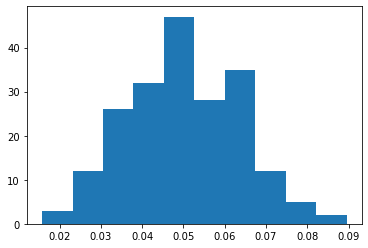

In [6]:
plt.hist(d1['value'])